# Netflix EDA 

## I am looking to perform a in-depth analysis of Netflix movies, and identify trends amongst users that can help determine which movies are most likely to perform the best based on the upcoming seasons for 2024. 

## I am acting as a Netflix employee, looking to present data to our stakeholders who determine which movies are going to be added.

### Import Libraries and load the data.

In [2]:
import pandas as pd
import numpy as np

In [3]:
filepath = 'netflix_titles.csv'
data = pd.read_csv(filepath)

In [4]:
# View initial data head

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Right off the bat, we can see that there are a lot of missing values from various columns, missing names, and even some columns that we could deem as irrelevant (such as description).

### I also do not like that there are multiple genres in "listed_in." Speaking of that column, I hate the name of that too. This table feels really messy. Sure, we could drop all missing values, but we'd end up cutting out A LOT of data. 

### Let's work on cleaning it up and even changing some of these names.

In [7]:
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')

# These are going to fill missing values in director, cast, and country to unknown

In [8]:
# I want to view how many null values remain

data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

### Not a lot of null values left, we could fill it if we really choose to, but it would be safe to drop the rest. 

In [9]:
data.dropna(inplace = True)

In [10]:
# We started with 8807 rows. Lets see how many rows we have left. 

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


### We have lost a total of 17 rows. We could fill the other null values with unknown values as well to keep the data, but for our purposes, we will proceed with the dataset as we have now. 

### Really quickly, lets check to see if we have any duplicate rows that we need to drop. 

In [11]:
data.duplicated().sum()

np.int64(0)

### I want to drop two columns from this dataset, showid, and description as they will not be giving us any value.

In [12]:
data.drop(['show_id'], axis = 1, inplace = True)
data.drop(['description'], axis = 1, inplace = True)

### I want to view the head once more to see what else we can manipulate to make our table look cleaner. 

In [13]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### My next steps are to change the date_added column to separate the year from the month, and drop the specific day. This will further help me group titles by month added. 

In [14]:
data['year_added'] = data['date_added'].str.split(', ').str[1]

# I am conducting a string split here. The entire string is being split into two elements, separated by a comma 
# as seen in the paranthesis. and we are choosing the SECOND (remember in python the first element is '0') element, 
# which is the year

In [15]:
# We will be doing the the same for date_added so that the year is removed from that column. 

data['date_added'] = data['date_added'].str.split(', ').str[0]

In [16]:
# Next we want to only keep the month, and get rid of the day it was added, and rename the date_added column

data['date_added'] = data['date_added'].str.split(' ').str[0]
data.rename(columns = {'date_added': 'month_added'}, inplace = True)

### We did quite some changes, lets see how it looks here. 

In [17]:
data.head(2)

,type,title,director,cast,country,month_added,release_year,rating,duration,listed_in,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,September,2020,PG-13,90 min,Documentaries,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,September,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021


### Before we reorder this, lets categorize the genres by one type only. 

In [18]:
data['listed_in'] = data['listed_in'].str.split(', ').str[0]

In [19]:
data = data[['type', 'title', 'listed_in', 'director', 'cast', 'country', 'release_year', 'month_added', 'year_added', 'duration', 'rating']]

In [20]:
data.rename(columns = {'listed_in': 'genre'}, inplace = True)

In [21]:
data.head()

,type,title,genre,director,cast,country,release_year,month_added,year_added,duration,rating
0,Movie,Dick Johnson Is Dead,Documentaries,Kirsten Johnson,Unknown,United States,2020,September,2021,90 min,PG-13
1,TV Show,Blood & Water,International TV Shows,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,September,2021,2 Seasons,TV-MA
2,TV Show,Ganglands,Crime TV Shows,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,September,2021,1 Season,TV-MA
3,TV Show,Jailbirds New Orleans,Docuseries,Unknown,Unknown,Unknown,2021,September,2021,1 Season,TV-MA
4,TV Show,Kota Factory,International TV Shows,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,September,2021,2 Seasons,TV-MA


### This is a CLEAN dataset we can use to begin creating some visuals.

# Data Visualization

### This is a simple dataset, that does not provide us with reviews and such. Therefore, we can only assume that the popular genres are there due to popular demand since this is historical data. 

### Lets start with a simple table displaying the top 5 genres on Netflix by count.

In [25]:
genre = data['genre'].value_counts().head(5)
genre_data = genre.reset_index()
genre_data

,genre,count
0,Dramas,1599
1,Comedies,1210
2,Action & Adventure,859
3,Documentaries,829
4,International TV Shows,773


In [27]:
# we need to import the viz libraries first

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\syed_\AppData\Local\Temp\ipykernel_29780\1755322260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'genre', y = 'count', data = genre_data, palette= 'husl')


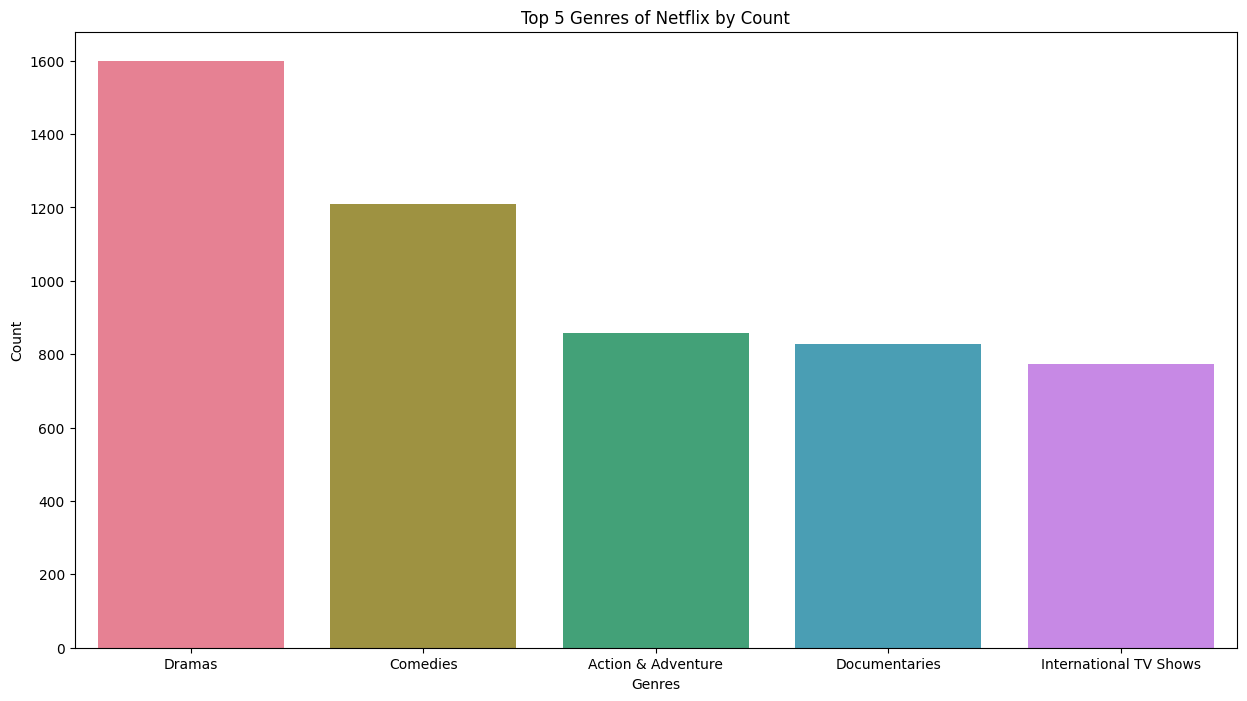

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'genre', y = 'count', data = genre_data, palette= 'husl')
plt.title('Top 5 Genres of Netflix by Count')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

In [29]:
unique_years = data['year_added'].unique()
print(unique_years)

['2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012'
 '2011' '2009' '2008' '2010']


### This dataset has data from 2010 - 2021, so we can see in those years, dramas have the highest movie count. We can infer its because they perform the best.